# Data visualization with python and matplotlib$^*$: A basic introductionn

**Author** : Ankit Gupta

**Creation Date** : 28 June, 2020


**System Specifications** :
 - Python version: 3.7.7
 - Matplotlib version: 3.1.3

Are you interested in plotting data with python? If yes, then you will find this Notebook useful. Let's continue.

Data visualization is an essential, routine task in any field regardless of how small or large the data is. Then be it plotting a simple sinusoidal curve or creating sophisticated, interactive dashboards. [Python](https://www.python.org/) being one of the most sought after programming languages of today (in the active top 3 on [Stack Overflow](https://stackoverflow.com/tags) in terms of questions being asked), made me develop a passion for exploring the data visualization opportunities in python.

[Matplotlib](https://matplotlib.org/) is one such powerful plotting library for python that offers varied spectrum of 1D, 2D, and 3D visualizations. Being an active contributor to answering [matplotlib related questions on Stack Overflow](https://stackoverflow.com/questions/tagged/matplotlib), I thought of creating a series of tutorials aimed at teaching the basic know-hows of how to use **python & matplotlib** for plotting using **downloadable, ready-to-use, Jupyter Notebooks.**

This tutorial is my first step towards this long-term goal. In the following Notebook, I will explain the basics of matplotlib, taking an example of one-dimensional plots together with basic bar and pie charts. In future, I will share further Notebooks on the basic elements of 2D and 3D plotting and other sophisticated techniques. The readers are expected to have some familiarity with the syntax of python programming language. 

[*. J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.](https://ieeexplore.ieee.org/document/4160265)

<br>
<br>

**Table of Contents**

2. [Plotting in 1D](#Plotting_in_1D)

3. [Customizing the 1D plot](#Customizing_the_1D_plot)

4. [Scatter plot](#Scatter_plot)

5. [Bar chart](#Bar_chart)

6. [Pie chart](#Pie_chart)

# Plotting in 1D 
<a id='Plotting_in_1D'></a>

I will make entensive use of comments (marked by a hash `#`) to document the code throughout the notebook and to add explanation at places needed.

## Loading necessary packages   

- To enable the inline plotting (render the plots within the notebook beneath the corresponding cell), you need `%matplotlib inline`. 
- If your screen has retina display, you can enhance the resolution of the figure by using `%config InlineBackend.figure_format = 'retina'`.
- If your system does not have 'Times New Roman' font installed, you can comment out the line `mpl.rc('font', ....)` using a `#`.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
import matplotlib.pyplot as plt # it is customary to import the module as "plt". You can call it anything though.

mpl.rc('font', family='Times New Roman', size=20) 

## The simplest plot 

### Plot directly a list of values

The *simplest example* would be to plot a list of values. Let's create a list of incremental values.

In [2]:
values = [5, 6, 7, 8, 9]

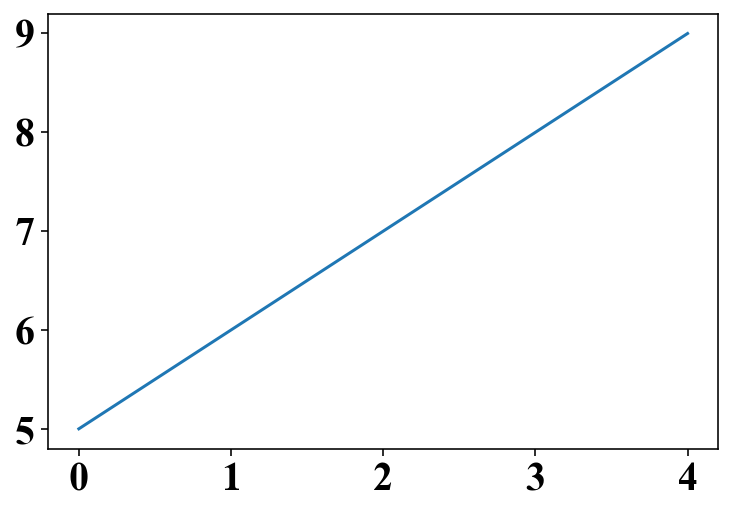

In [3]:
plt.plot(values)

As you saw in the figure above, the `values` list you plotted are shown on the y-axis. For plotting on x-y space, you typically need two lists: one for the x-values and the other for the y-values. 

Did you notice that the figure was created without passing the x-values?

By default, if you pass a single list to `plt.plot()`, the x-values to be plotted assume integer values starting from 0 until the length of y-list minus 1. In the above figure, `values` had a length of 5 (5 elements). So the x-values became 0, 1, 2, 3, 4 (because indexing starts from 0 in python). In other words, the x-values are `range(len(values))` where `len(values)` returns the length of the list, which is 5. Therefore, the following line will also plot the same figure:

```
plt.plot(range(len(values)), values)
```

In the above example, you can also simply do

```
plt.plot([5, 6, 7, 8, 9])
```

$\Rightarrow$ **NOTE:** If you are using some other python IDE, such as spyder for example, you will need to use `plt.show()` after the `plt.plot()` command for the figure window to appear. In this Jupyter Notebook, you don't need it.

## Let's plot some functions $y=f(x)$

We will plot the following two functions: 

- $y = {\rm{sin}}(x)$ 
- $y = {\rm{cos}}(x)$ 

for $x \in (0, 3\pi)$

We first need to load the [NumPy package](https://numpy.org/) for computing the function in a vectorised manner.

In [4]:
import numpy as np

Next, we define the x-values and compute the values of the two functions.

In [5]:
x_1 = np.linspace(0., 3*np.pi, 100) # 0 to 3*Pi in 100 steps
x_2 = np.linspace(0., 3*np.pi, 50)  # 0 to 3*Pi in 50 steps

y_1 = np.sin(x_1) 
y_2 = np.cos(x_2)

Let's now plot both the functions in the same figure. In a 1-d plot, the two important elements are lines and markers (symbols). Both of them have their own properties that can be customized while plotting. Here I will provide some necessary properties (with selected options) that must be known.

Here, if you want to have a large figure, you can define a `figure` object and pass the size of the figure as an argument.

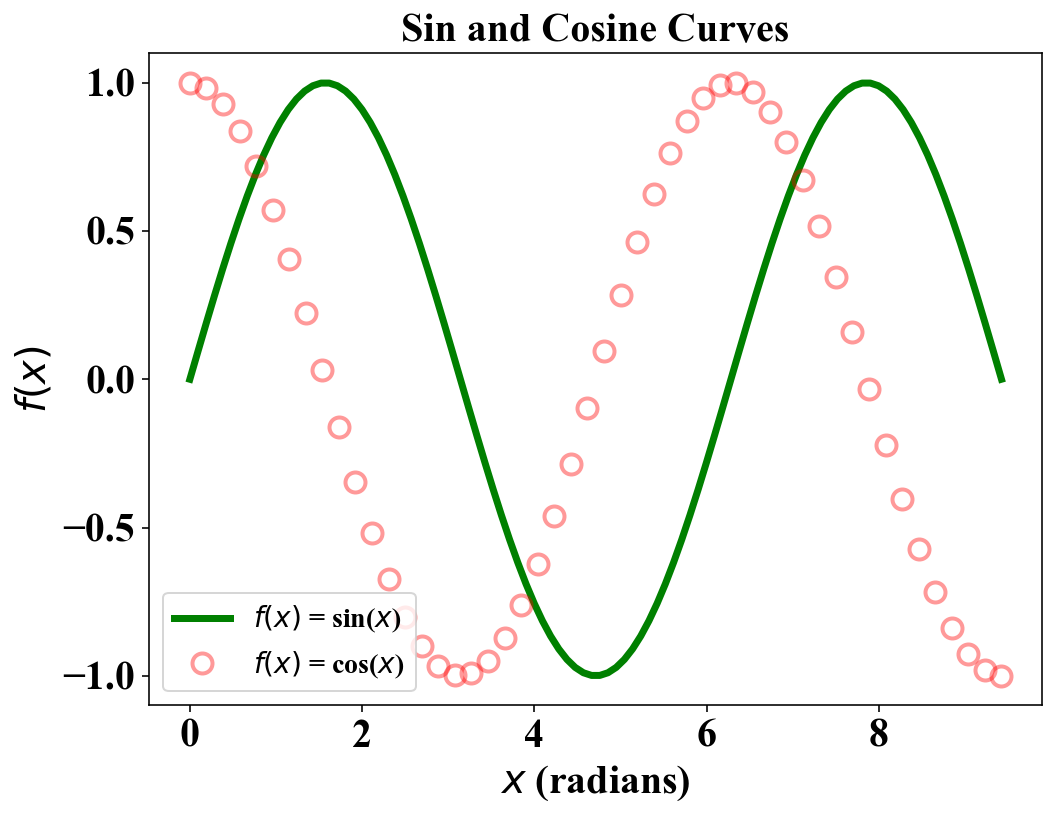

In [6]:
fig = plt.figure(figsize=(8,6)) # Figure size (width, height)

# Plot the first function using lines
plt.plot(x_1, y_1, '-g', linewidth=3.5, label='$f(x)$ = sin($x$)')

# Plot the second function using markers
plt.plot(x_2, y_2, 'ro', markersize=10, mfc='None', mew=2, alpha=0.4, linewidth=1.5, label='$f(x)$ = cos($x$)')

# Enable the legends; 'loc' can also be a (x, y) tuple on a fractional coordinate system.
# For ex. Try using loc=(1.05, 0.5) or loc=(0.5, 0.2) etc. 
plt.legend(loc='best', fontsize=14)

# Set the x- and y-axis labels; For math mode, we enclose the desired text in `$...$` 
plt.xlabel('$x$ (radians)', fontsize=20)
plt.ylabel('$f(x)$', fontsize=20)

# Set the title  
plt.title('Sin and Cosine Curves', fontsize=20)

# Save the figure in a pdf form. You can also use ''.png' or '.jpg' or '.eps' etc.
# You can also specify a path '/Users/gupta/Desktop/sin_and_cos.pdf'
plt.savefig('sin_and_cos.pdf', bbox_inches='tight', dpi=5000)

## Object-Oriented Approach to Plotting

Now let's use an object-oriented approach that will enable better manipulation of the properties of the figure. Among others, there are two following possibilities. My favorite is the **second approach**, which is what I will use henceforth. 


**Method 1**

```
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
```

**Method 2**

```
fig, ax = plt.subplots(figsize=(8,6))
```

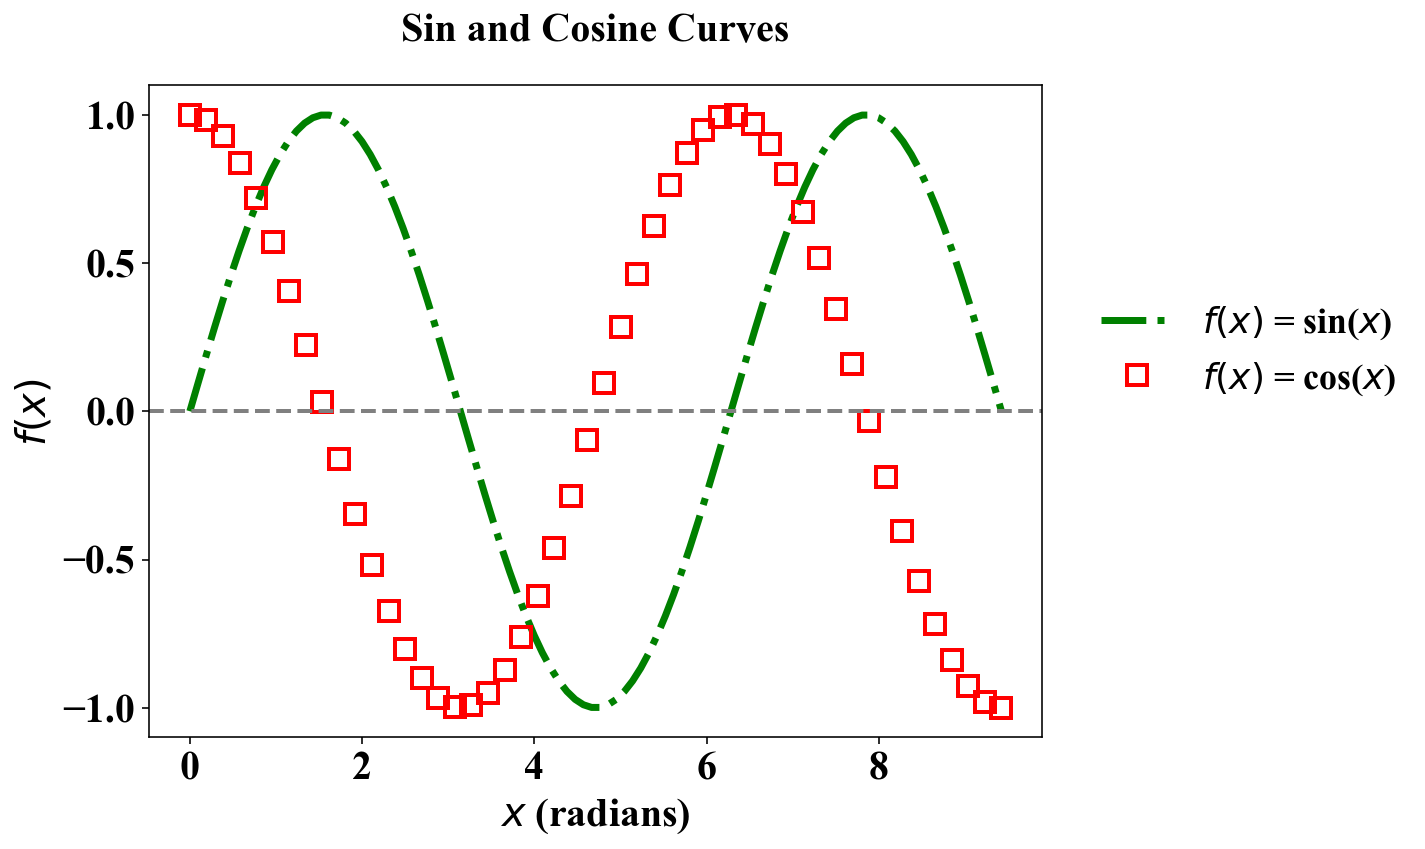

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_1, y_1, '-.g', linewidth=3.5, label='$f(x)$ = sin($x$)')

ax.plot(x_2, y_2, 'rs', ms=10, mfc='None', mew=2, alpha=1, linewidth=1.5, label='$f(x)$ = cos($x$)')

# Put a horizontal line as y=0
ax.axhline(0, c='gray', linestyle='--', linewidth=2)

# Use frameon=False to disable the outer edge of the legend box
ax.legend(loc=(1.05, 0.5), fontsize=18, frameon=False)

# Note that now you need 'set_xlabel' and 'set_ylabel' unlike 'plt.xlabel' and 'plt.ylabel'
ax.set_xlabel('$x$ (radians)', fontsize=20)
ax.set_ylabel('$f(x)$', fontsize=20)

# Note that now you need 'set_title'; Choose value of y to control the vertical position of the title
ax.set_title('Sin and Cosine Curves', fontsize=20, y=1.05);

# Customizing the 1D plot
<a id='Customizing_the_1D_plot'></a>

## Choosing line styles and markers

In both the above approaches, you saw that I used a solid line and square shaped markers (symbol). You might be wondering how you can change the line style and the marker style. <br> <br> The following section will illustrate the choice of lines and markers and how you can customize them.  

---

**1. Line styles:** You can either explicitly use the keyword `linestyle='-'` or abbreviation `ls='-'`
- `'-'` : solid line
- `'--'`: dashed line
- `'-.'`: dashed-dotted line 
- `'.'` : dotted line  
 
 ---
 
**2. Markers:** You can use the keyword `marker='o'` and following are the few markers available
 - `'o'`: circle
 - `'s'`: square
 - `'p'`: pentagon
 - `'h'`: hexagon
 - `'^'`: up-triangle
 - `'v'`: down-triangle
 - `'x' `: crosses
 - `'+'`: plus
 
 

## Choosing Colors

---
 
**3. Colors:** You can either explicitly use the keyword `color='g'` or abbreviation `c='g'`
 - Standard colors can be used as single letters:  `'r'`, `'g'`, `'b'`, `'k'`, `'o'`  for red, green, blue, black, orange etc. 
 - You can also specify the complete name as `'red'`, `'green'`, `'orange'` for standard colors as well as other colors such as `'navy'`, `'darkorange'`, `'indigo'` . 
 - The complete list of allowed colors can be found [here](https://matplotlib.org/3.1.0/gallery/color/named_colors.html).

$\Rightarrow$ **Trick:** You can combine both the linestyle and the color by using the short hand notation of `'-r'`, `'--g'`, `-.k` etc. However, you *cannot* use something like `linestyle='-.r'` or `ls='-k'` because now you are specifying the properties for line styles but assigning both line style and color together. 

---

**BONUS: Combining line and markers**

$\Rightarrow$ If you want to use both line and marker, there are two ways you can achieve it. Suppose you want a red dashed-dotted line with a square shaped marker, you can use either of the following:

- `'-.rs'` 
- `'-.r', marker='s'` 

## Controlling properties of lines and markers

In the previous section, you learned which linestyles and markers you can use. Now you will learn how to customize the properties of lines and markers.

**1. Lines:**

   - `lw` means line width, e.g.: `lw=2`. You can also use the keyword `linewidth=2`
   - `alpha` controls transparency (1 means completely opaque, 0 means completely transparent). You can choose any float value between 0 and 1


**2. Markers:**

   - `ms` means marker size, e.g.: `ms=10`. You can also use the keyword `markersize=10`
   - `mfc` means marker face color, e.g.: `mfc='green'`. You can also use the keyword `markerfacecolor='green'`
   - `mec` means marker edge color, e.g.: `mec='red'`. You can also use the keyword `markeredgecolor='red'`
   - `mew` means marker edge width, e.g.: `mew=5`. You can also use the keyword `markeredgewidth=5`
   - `alpha` controls transparency (1 means opaque, 0 means completely transparent). You can choose any float value between 0 and 1
   
$\Rightarrow$ If you plot both lines and markers in the same command, a single `alpha` parameter will apply to both. It is also possible to have different transparencies for lines and markers. This, however, falls outside the scope of this basic tutorial.    

# Scatter plot
<a id='Scatter_plot'></a>

So far you saw the `plot` module where the two different curves were plotted using lines and markers. Sometimes, you would want to have a scatter plot. This can either be achieved using markers as you saw for the cosine curve above or directly via a `scatter` plot.

$\Rightarrow$ You saw above that in `plt.plot()`, you can just pass y-values and the x-values will be automatically be generated. However, in scatter plot, **you need to pass both x and y-values**.

Following are some essential parameters passed to the scatter plot:

- `marker`: to choose the scatter style. You **cannot** use abbreviation `m` in this case.
- `s`: to define the marker size
- `c`: to define color. You can also use `color`.
- `edgecolor`: to define the color of the edge of the marker. You can also use `ec`.
- `facecolor`: to define the color of the marker. You can also use `fc`. It does the same thing as `c`. However, if you first specify `c='red'` and then also specify `facecolor='blue'`, then the initially set red marker will now be superceded by the blue color.


Similar to `plt.plot()`, for standard colors, you can either use full name (`red`, `blue`, `green` etc.) or use first letters `'r'`, `'g'`, `'b'` etc.

$\Rightarrow$ You can play around with `True` and `False` values in the `ax.legend()` to see how it affects the legend box.

$\Rightarrow$ You can read the [official documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of scatter plots for more details. 

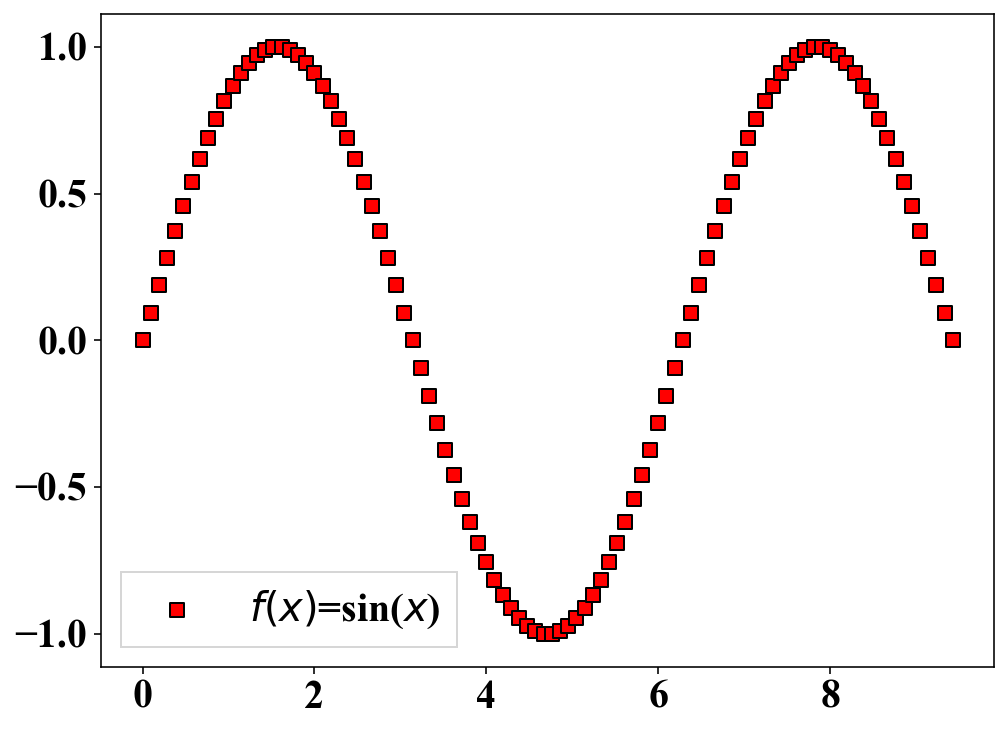

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(x_1, y_1, color='red', marker='s', edgecolor='black', s=50, label='$f(x)$=sin($x$)')

# 'fancybox=False' produces a legend box with sharp edges.
ax.legend(loc='best', frameon=True, fancybox=False);

In the above code block, you could also have used `plt.scatter()` as following 

```
fig = plt.figure(figsize=(8,6))
plt.scatter(x_1, y_1, color='red', marker='s', edgecolor='black', s=50, label='$f(x)$=sin($x$)')
plt.legend(loc='best', frameon=True, fancybox=False)
```
---

# Bar chart
<a id='Bar_chart'></a>

## Vertical (column) bar chart

Let's now see how to plot a [basic vertical bar chart](https://en.wikipedia.org/wiki/Bar_chart) with matplotlib. 

$\Rightarrow$ I will use object-oriented approach. You can use `plt.bar()` as well.

Following are some essential parameters passed to the bar plot:

- `width`: width of the bar.
- `edgecolor`: to define the edge color of the bars. You can also use `ec`.
- `linewidth`: to define the width of the edge of the bars. You can also use `lw`.
- `linestyle`: to define the style of the edges. You can also use `lw`. The same styles can be used as specified before for line plots.
- `color`: to define the color/colors of the bars. You **cannot** use abbreviation `c` in this case.
- `hatch`: to define the hatch/fill style of the bars. You can use styles like `o`, `*`, `/`, `//`, `\\`, `-`, `+`, `|`. The hatches will also have the same color as the edges.

$\Rightarrow$ You can read the [official documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) of bar charts for more details. 

Let's define some sample data, for example grades of 5 students in mathematics.

In [9]:
names = ['Tom', 'Mark', 'Sam', 'Jim', 'Henry']
grades = [79, 85, 49, 98, 65]

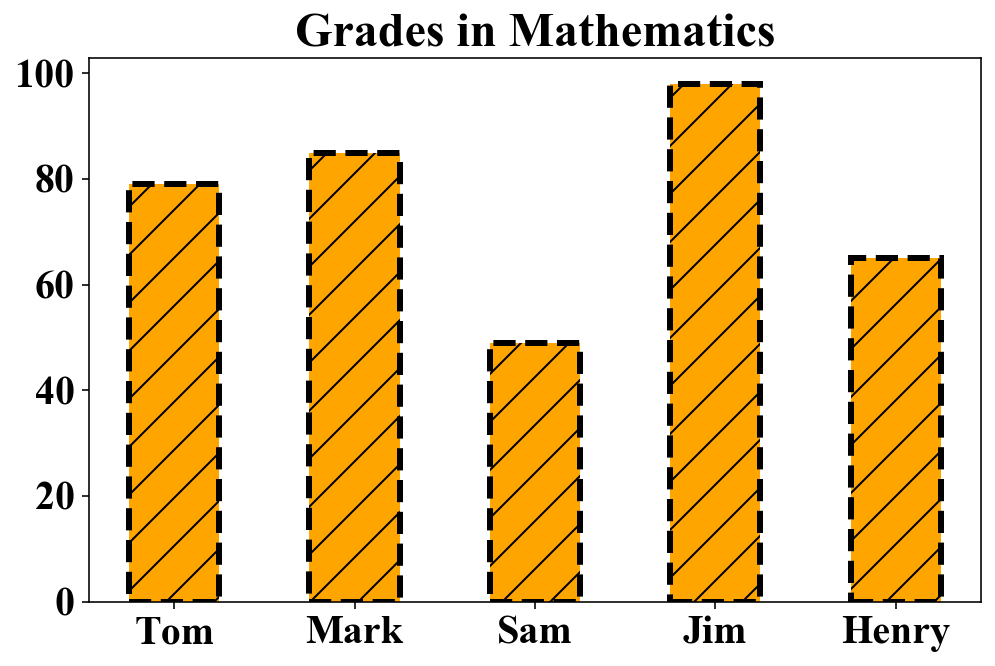

In [10]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(names, grades, width=0.5, hatch='/', edgecolor='black', ls='--', linewidth=3, color='orange')
ax.set_title("Grades in Mathematics");

$\Rightarrow$ If you want each bar with a specific color, you can also pass a list of desired colors. If the number of elements in the colors list is less than the number of bars, the color cycle will repeat itself. 

As shown below, for example, if you have 5 bars but you use `color=['r', 'b', 'g']`, the first 3 bars will respectively be red, blue, green and then the remaining two bars will be red and blue, respectively.

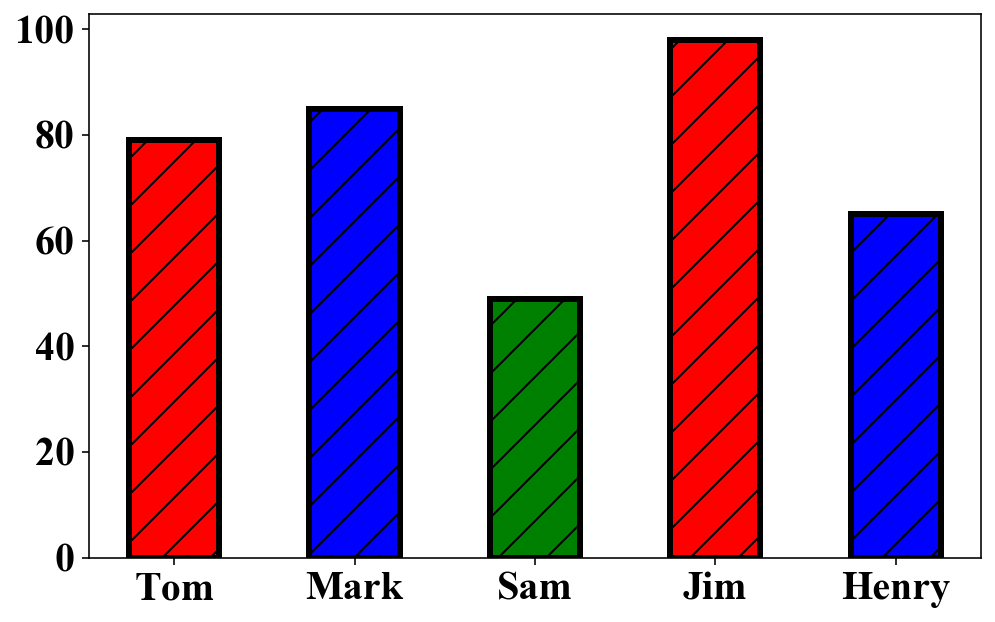

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(names, grades, width=0.5, hatch='/', edgecolor='black', linewidth=3, color=['r', 'b', 'g']);

## Horizontal bar chart

For plotting a horizontal bar chart, you just need to use `barh` instead of `bar`. 

$\Rightarrow$ Most importantly, you have to replace the `width` of the bars by the keyword `height`.

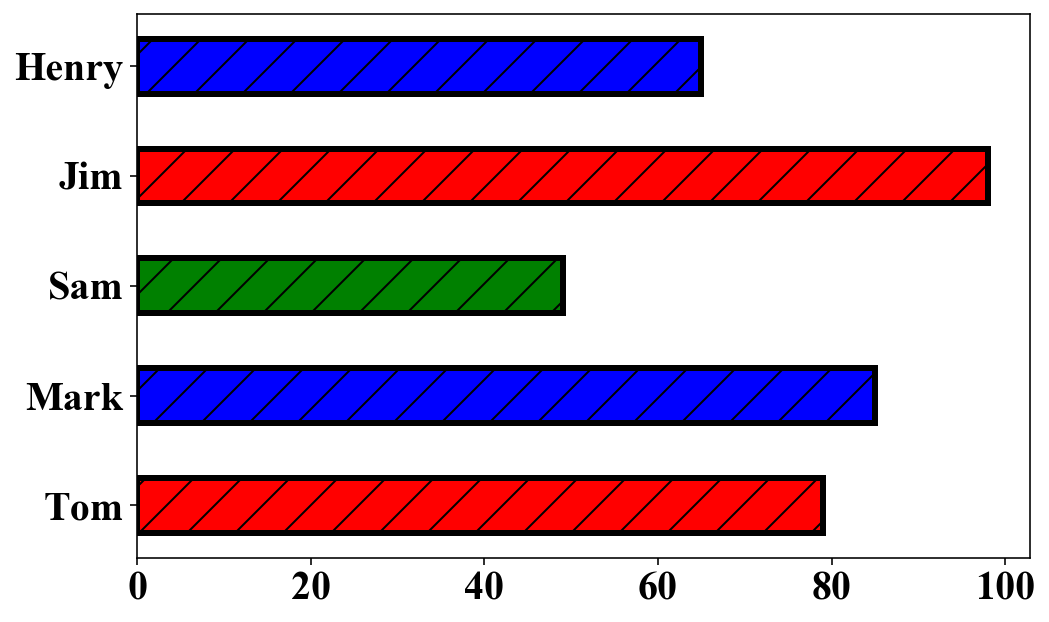

In [12]:
fig, ax = plt.subplots(figsize=(8,5))

ax.barh(names, grades, height=0.5, hatch='/', edgecolor='black', linewidth=3, color=['r', 'b', 'g']);

# Pie chart
<a id='Pie_chart'></a>

$\Rightarrow$ You can as well use `plt.pie()` as well.

Following are some essential parameters passed to the pie chart:

- `labels`: name labels for the wedges of the pie chart.
- `shadow`: to enable the fancy shadow effect. It can be either `True` or `False`.
- `labeldistance`: to control the distance of `labels` **radially away** from or close to the pie chart centre. 
- `autopct`: to automatically calculate the percentage distribution and label each wedge with the corresponding value with defined format. For example, `'%.0f%%'` will display percentages as integer values, `'%.2f%%'` will display percentages up to two decimal places.


$\Rightarrow$ You can read the [official documentation](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html) of pie charts for more details. 

In [13]:
names = ['Tom', 'Mark', 'Sam', 'Jim', 'Henry']
shares = [15, 13, 46, 22, 30]

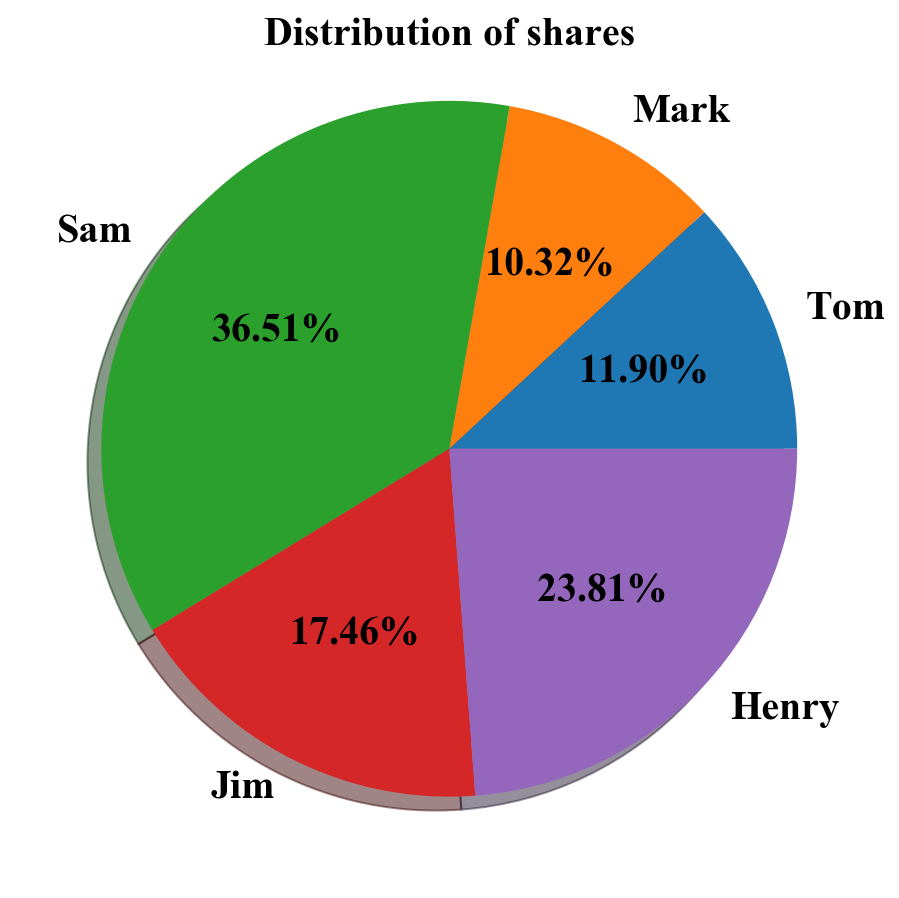

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

ax.pie(shares, labels=names, autopct='%.2f%%', shadow=True, labeldistance=1.1)
ax.set_title('Distribution of shares', fontsize=20, y=0.95);

## Styling the pie chart

If you wish to highlight the person with the highest contribution, you can split the biggest wedge from the pie chart. This is achieved using the option `explode`.

You need to specify the value of `explode` that will quantify how far the splitted wedge will be from the rest of the pie chart. Since we have 5 people, we need to specify a list containing explode value for all of them. For example, `explode = [0, 0, 0.15, 0, 0]`. You can also specify finitie values for all the elements. For example, `explode = [0.1, 0.2, 0.3, 0.4, 0.5]` is also a valid choice. The following example illustrates this point.

$\Rightarrow$ Here I am manually specifying the value 0.15 as the third element of `explode` list because the highest percentage is for "Sam", the third element of the `names` list. One can also automatically determine the largest value and assign the explode. This task is, however, outside the scope of this Tutorial.

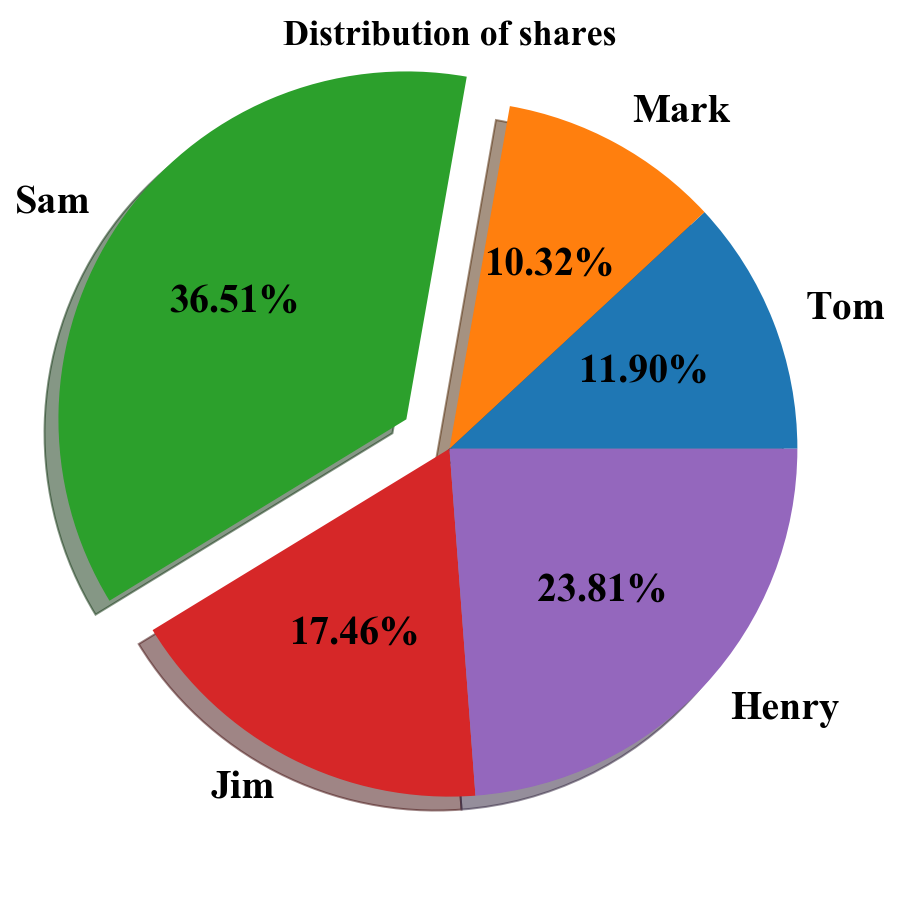

In [15]:
fig, ax = plt.subplots(figsize=(8,8))

explode = [0, 0, 0.15, 0, 0]

ax.pie(shares, labels=names, explode=explode, autopct='%.2f%%', shadow=True, labeldistance=1.1)
ax.set_title('Distribution of shares', fontsize=18, y=0.95);